# Model deployment for diabetic_data.csv

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib

df = pd.read_csv('diabetic_data.csv')

df1 = df.select_dtypes(include=['number'])

X = df1.drop('num_procedures' , axis=1)
y = df1['num_procedures']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

model = RandomForestClassifier()
model.fit(X_scaled,y)

joblib.dump(model , "DIABETIC.PKL")
joblib.dump(scalar , "DIABETIIC_SCALAR.PKL")

['DIABETIIC_SCALAR.PKL']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

df = pd.read_csv('diabetic_data.csv')
df1 = df.select_dtypes(include=['number'])

X = df1.drop('num_procedures' , axis=1)
y = df1['num_procedures']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train_saled = scalar.fit_transform(X_train)

model = RandomForestClassifier()
model.fit(X_train_saled , y_train)

RandomForestClassifier()

In [4]:
import pickle as pkl

with open("DIABETIC.PKL" , "wb") as f:
    pkl.dump(model , f)

with open("DIABETIC_SCALAR.PKL" , "wb") as f:
    pkl.dump(scalar , f)

import joblib

joblib.dump(model , "DIABETIC_MODEL_JOBLIB.PKL")
joblib.dump(scalar , "DIABETIC_SCALAR_JOBLIB.PKL")

['DIABETIC_SCALAR_JOBLIB.PKL']

In [5]:
import pickle as pkl

with open("DIABETIC.PKL" , "rb") as f:
    loaded_data = pkl.load(f)

import joblib

loaded_data = joblib.load("DIABETIC_MODEL_JOBLIB.PKL")

X_test_scaled = scalar.transform(X_test)
prediction = loaded_data.predict(X_test)

c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('diabetic_data.csv')

df1 = df.select_dtypes(include=['number'])

X = df1.drop('num_procedures' , axis=1)
y = df1['num_procedures']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train_saled = scalar.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=5 , random_state=42)
model.fit(X_train_saled , y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [7]:
from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[: , 1]

print("Confusion matrix : " , confusion_matrix(y_test , y_pred))
print("Classification report : " , classification_report(y_test , y_pred))
print("ROC AUC : " , roc_auc_score(y_test , y_pred_prob))

c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Confusion matrix :  [[  41   71   46  956 5779    2 2408]
 [  13   22    9  433 1987    1 1652]
 [   4   14    8  304 1124    1 1130]
 [   1    4    4  230  839    1  830]
 [   1    4    4   88  345    0  397]
 [   0    2    0   84  223    0  266]
 [   0    3    1   99  355    1  567]]
Classification report :                precision    recall  f1-score   support

           0       0.68      0.00      0.01      9303
           1       0.18      0.01      0.01      4117
           2       0.11      0.00      0.01      2585
           3       0.10      0.12      0.11      1909
           4       0.03      0.41      0.06       839
           5       0.00      0.00      0.00       575
           6       0.08      0.55      0.14      1026

    accuracy                           0.06     20354
   macro avg       0.17      0.16      0.05     20354
weighted avg       0.38      0.06      0.03     20354



ValueError: multi_class must be in ('ovo', 'ovr')

In [8]:
import joblib 

joblib.dump(model , "DIABETIC_MODEL_JOBLIB.PKL")
joblib.dump(scalar , "DIABETIC_SCALAR_JOBLIB.PKL")

['DIABETIC_SCALAR_JOBLIB.PKL']

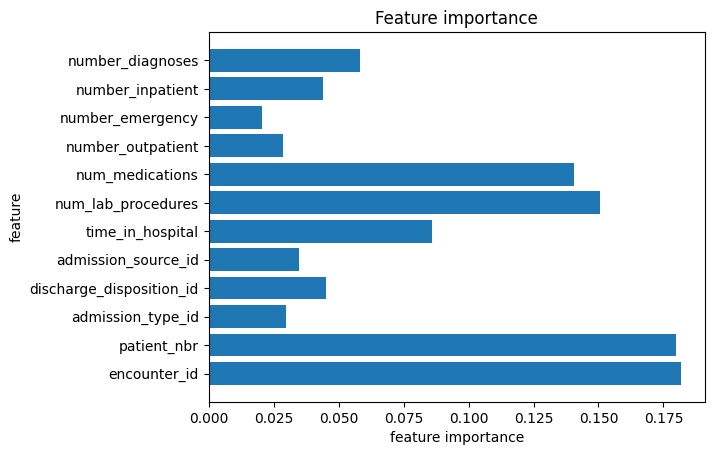

<Figure size 1000x600 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('diabetic_data.csv')

df1 = df.select_dtypes(include=['number'])

feature = df1.drop('num_procedures' , axis=1).columns
importances = model.feature_importances_
plt.barh(feature , importances)
plt.title("Feature importance")
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.figure(figsize=(10,6))

plt.show()